In [181]:
import Pkg
Pkg.activate("../../.")
include("../../LogLoss/RealRealHighDimension.jl")
include("../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [182]:
svpath_ns = "../../Data/epilepsy/mps_saves/legendreNN2_ns_d18_chi50.jld2";
dloc =  "../../Data/epilepsy/datasets/Epilepsy2.jld2";

In [183]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [184]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 80 training samples and 11420 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 18, chi_max = 50

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [185]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index=Index(opts_ns.d)
xvals_enc= [get_state(x, opts_ns) for x in xvals]
xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

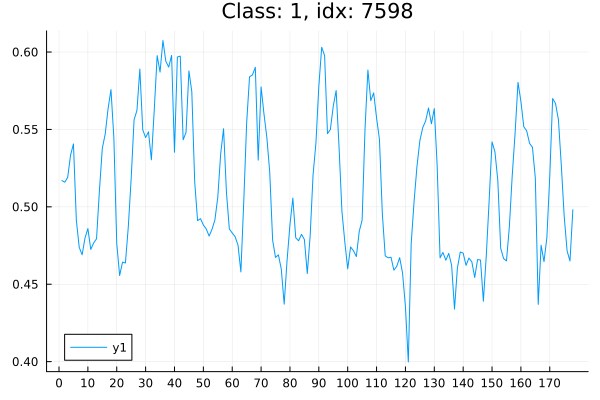

In [258]:
c0_idxs = findall(x -> x .== 0, y_test)
c1_idxs = findall(x -> x .== 1, y_test)
idx = rand(c1_idxs)
plot(X_test[idx, :], title="Class: $((y_test[idx])), idx: $idx", xticks=(0:10:178))

In [264]:
max_jump=nothing
class = 1
interp_sites = collect(100:150)
instance_idx = 7598
stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, instance_idx, interp_sites, :directMode; 
    NN_baseline=false, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, 
    mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, 
    xvals_enc_it=xvals_enc_it, max_jump=max_jump);


(i, x_prev, mx) = (1, -0.0646893377652773, -0.0892)
(i, x_prev, mx) = (2, -0.0892, -0.057)
(i, x_prev, mx) = (3, -0.057, -0.0547)
(i, x_prev, mx) = (4, -0.0547, -0.0563)
(i, x_prev, mx) = (5, -0.0563, -0.021)
(i, x_prev, mx) = (6, -0.021, -0.0025)
(i, x_prev, mx) = (7, -0.0025, 0.1098)
(i, x_prev, mx) = (8, 0.1098, 0.1808)
(i, x_prev, mx) = (9, 0.1808, 0.1355)
(i, x_prev, mx) = (10, 0.1355, 0.1469)
(i, x_prev, mx) = (11, 0.1469, 0.1094)
(i, x_prev, mx) = (12, 0.1094, 0.085)
(i, x_prev, mx) = (13, 0.085, -0.0165)
(i, x_prev, mx) = (14, -0.0165, -0.0689)
(i, x_prev, mx) = (15, -0.0689, -0.0685)
(i, x_prev, mx) = (16, -0.0685, -0.0649)
(i, x_prev, mx) = (17, -0.0649, -0.0764)
(i, x_prev, mx) = (18, -0.0764, -0.073)
(i, x_prev, mx) = (19, -0.073, -0.0661)
(i, x_prev, mx) = (20, -0.0661, -0.0863)
(i, x_prev, mx) = (21, -0.0863, -0.1308)
(i, x_prev, mx) = (22, -0.1308, -0.2116)
(i, x_prev, mx) = (23, -0.2116, -0.0565)
(i, x_prev, mx) = (24, -0.0565, 0.0093)
(i, x_prev, mx) = (25, 0.0093, 0.0

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│    MAE │ 0.0443032 │
╰────────┴───────────╯


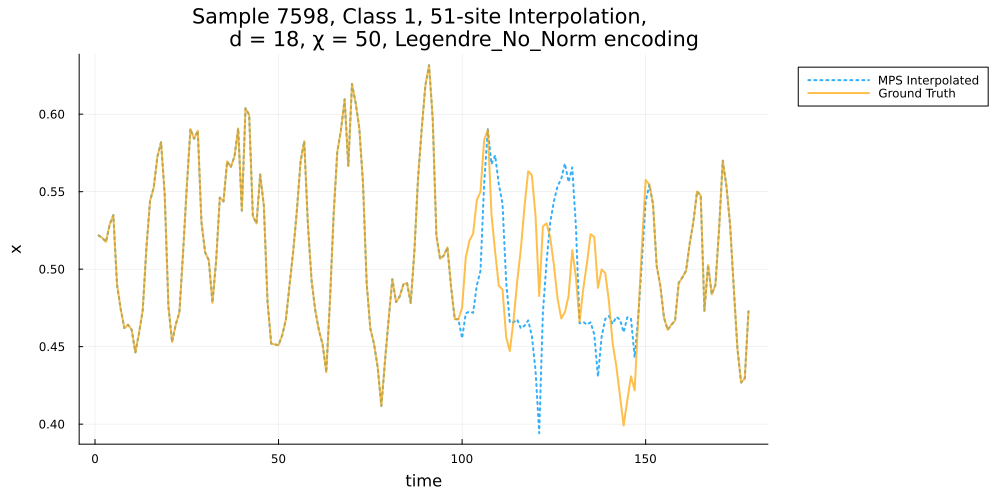

In [265]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)
#savefig("../../../../Desktop/test.svg")

----

# Resampled Version

In [266]:
svpath_ns = "../../Data/epilepsy/mps_saves/legendreRS_ns_d18_chi50.jld2";
dloc =  "../../Data/epilepsy/datasets/Epilepsy2_RS_200_100.jld2";

In [267]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [268]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 200 training samples and 100 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 18, chi_max = 50

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [269]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index=Index(opts_ns.d)
xvals_enc= [get_state(x, opts_ns) for x in xvals]
xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

In [322]:
max_jump=0.1
class = 1
interp_sites = collect(30:100)
instance_idx = 25
stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, instance_idx, interp_sites, :directMode; 
    NN_baseline=false, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, 
    mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, 
    xvals_enc_it=xvals_enc_it, max_jump=max_jump);

(i, x_prev, mx) = (1, 0.06605504587155964, 0.0571)
(i, x_prev, mx) = (2, 0.0571, 0.0534)
(i, x_prev, mx) = (3, 0.0534, -0.0045)
(i, x_prev, mx) = (4, -0.0045, 0.0555)
(i, x_prev, mx) = (5, 0.0555, 0.1212)
(i, x_prev, mx) = (6, 0.1212, 0.11)
(i, x_prev, mx) = (7, 0.11, 0.1502)
(i, x_prev, mx) = (8, 0.1502, 0.1225)
(i, x_prev, mx) = (9, 0.1225, 0.115)
(i, x_prev, mx) = (10, 0.115, 0.1294)
(i, x_prev, mx) = (11, 0.1294, 0.0294)
(i, x_prev, mx) = (12, 0.0294, 0.1279)
(i, x_prev, mx) = (13, 0.1279, 0.1319)
(i, x_prev, mx) = (14, 0.1319, 0.0319)
(i, x_prev, mx) = (15, 0.0319, 0.0429)
(i, x_prev, mx) = (16, 0.0429, 0.1036)
(i, x_prev, mx) = (17, 0.1036, 0.0791)
(i, x_prev, mx) = (18, 0.0791, -0.0209)
(i, x_prev, mx) = (19, -0.0209, -0.0837)
(i, x_prev, mx) = (20, -0.0837, -0.0782)
(i, x_prev, mx) = (21, -0.0782, -0.0795)
(i, x_prev, mx) = (22, -0.0795, -0.0804)
(i, x_prev, mx) = (23, -0.0804, -0.0849)
(i, x_prev, mx) = (24, -0.0849, -0.0733)
(i, x_prev, mx) = (25, -0.0733, -0.0638)
(i, x_prev

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│    MAE │ 0.0117394 │
│ NN_MAE │ 0.0112999 │
╰────────┴───────────╯


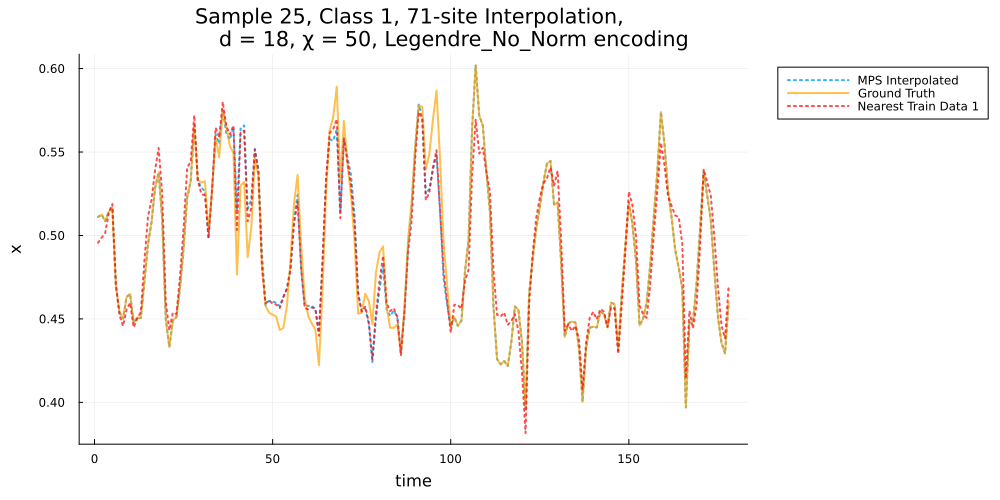

In [321]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)